In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_data():
    url = "http://lib.stat.cmu.edu/datasets/boston"
    df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)
    X = np.hstack([df.values[::2, :], df.values[1::2, :2]])
    y = df.values[1::2, 2]

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1))

    return X, y, scaler_y

X, y, scaler_y = load_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(323, 13) (81, 13) (102, 13)


In [8]:
import tensorflow as tf

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

# Create and compile model
model = create_model()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model with simplified data handling
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.3538 - mae: 0.8707 - val_loss: 0.7182 - val_mae: 0.6505
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7508 - mae: 0.6163 - val_loss: 0.4812 - val_mae: 0.5074
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4950 - mae: 0.4929 - val_loss: 0.3843 - val_mae: 0.4498
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3691 - mae: 0.4390 - val_loss: 0.3209 - val_mae: 0.4022
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2890 - mae: 0.3937 - val_loss: 0.2780 - val_mae: 0.3678
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2320 - mae: 0.3464 - val_loss: 0.2541 - val_mae: 0.3387
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1944 - mae: 0.3097 - val_loss: 0.2394 - val_mae: 0.3198
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1712 - mae: 0.2918 - val_loss: 0.2304 - val_mae: 0.3083
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.156

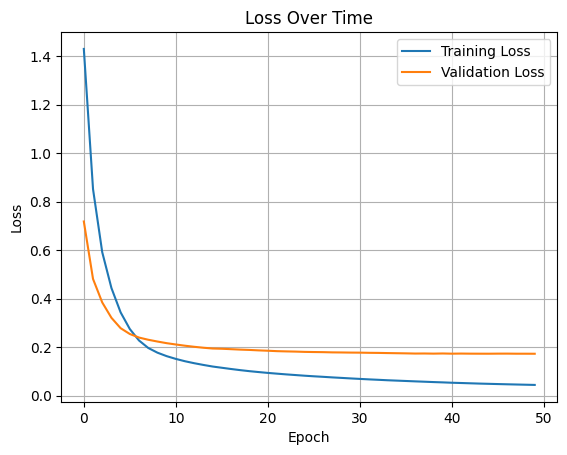

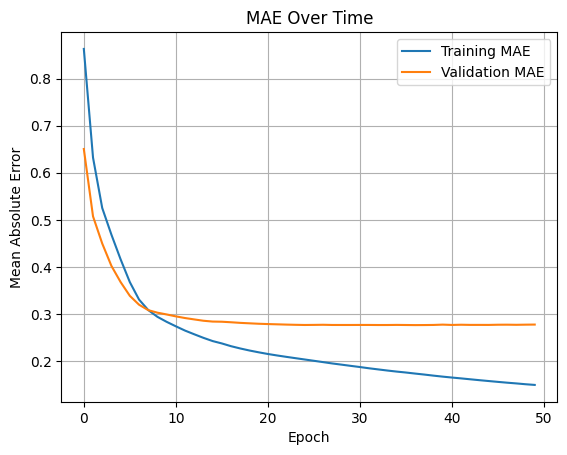

In [10]:
# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Time')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

# Make predictions and convert to original scale
test_predictions = model.predict(X_test)
test_predictions_original = scaler_y.inverse_transform(test_predictions)
test_actual_original = scaler_y.inverse_transform(y_test)

# Calculate MAE, RMSE, and R2
mae = np.mean(np.abs(test_predictions_original - test_actual_original))
rmse = np.sqrt(np.mean((test_predictions_original - test_actual_original) ** 2))
r2 = 1 - (np.sum((test_actual_original - test_predictions_original) ** 2) / 
          np.sum((test_actual_original - np.mean(test_actual_original)) ** 2))

# Print results
print(f"Test Mean Absolute Error: ${mae:.2f}k")
print(f"Root Mean Square Error: ${rmse:.2f}k")
print(f"R-squared: {r2:.4f}")

# Sample predictions vs actual values
for pred, actual in zip(test_predictions_original[:5], test_actual_original[:5]):
    print(f"Predicted: ${pred[0]:.2f}k, Actual: ${actual[0]:.2f}k")


Test Mean Absolute Error: 0.25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Test Mean Absolute Error: $2.31k
Root Mean Square Error: $3.65k
R-squared: 0.8187
Predicted: $27.67k, Actual: $23.60k
Predicted: $37.04k, Actual: $32.40k
Predicted: $15.69k, Actual: $13.60k
Predicted: $23.56k, Actual: $22.80k
Predicted: $15.95k, Actual: $16.10k


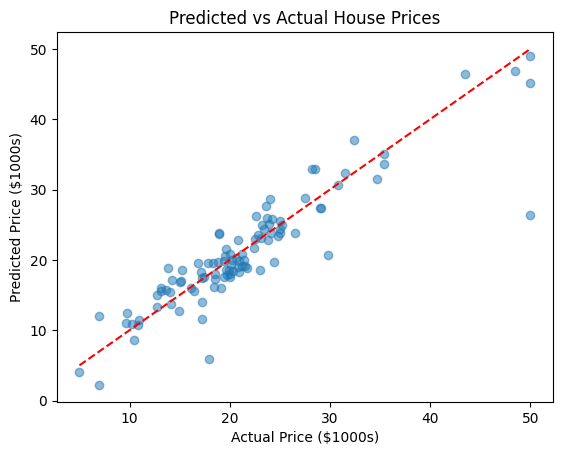

In [12]:
plt.scatter(test_actual_original, test_predictions_original, alpha=0.5)
plt.plot([test_actual_original.min(), test_actual_original.max()],
         [test_actual_original.min(), test_actual_original.max()], 'r--')
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title('Predicted vs Actual House Prices')
plt.show()
